In [34]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

In [35]:
# Load datasets
envi_tax = pd.read_excel("/Users/khangphamgia/Downloads/Environmental_Taxes_Cleaned.xlsx")
household_cons = pd.read_excel("/Users/khangphamgia/Downloads/Household Consumption Expenditure.xlsx")
renew_energy_share = pd.read_excel("/Users/khangphamgia/Downloads/Renewable Energy Share.xlsx")
elec_prod = pd.read_excel("/Users/khangphamgia/Downloads/Electricity Production.xlsx")
econ = pd.read_excel("/Users/khangphamgia/Downloads/Economic_Indicators.xlsx")

In [36]:
envi_tax["Country"].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas, The', 'Bangladesh', 'Belgium', 'Belize', 'Bolivia',
       'Bulgaria', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Chad',
       'China, P.R.: Mainland', 'Congo, Dem. Rep. of the',
       'Congo, Rep. of', 'Costa Rica', 'Croatia, Rep. of', 'Cyprus',
       'Czech Rep.', "Côte d'Ivoire", 'Denmark', 'Ecuador',
       'Egypt, Arab Rep. of', 'Estonia, Rep. of', 'Eswatini, Kingdom of',
       'Fiji, Rep. of', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Kenya', 'Korea, Rep. of', 'Kyrgyz Rep.', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Mauritania, Islamic Rep. of', 'Mauritius', 'Mexico', 'Mongolia',
       'Morocco', 'Namibia', 'Netherlands, The', 'Nicaragua', 'Niger',
       'Nigeria', 'Norway', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Pola

In [37]:
# Select the countries whose region is Aisa
envi_tax_asia = envi_tax[envi_tax['Region'] == 'Asia']
envi_tax_asia.head()


,Country,Year,Environmental Taxes (Domestic Currency),Environmental Taxes (% of GDP),Region
105,Bangladesh,2000,NaN,NaN,Asia
106,Bangladesh,2001,1.473000e+09,0.05,Asia
107,Bangladesh,2002,2.298000e+09,0.07,Asia
108,Bangladesh,2003,2.938000e+09,0.08,Asia
109,Bangladesh,2004,2.504000e+09,0.07,Asia


In [38]:
# Change a country name to match the other datasets
envi_tax_asia["Country"] = envi_tax_asia["Country"].replace("Vietnam", "Viet Nam")
# Run summary statistics for each country 
envi_tax_asia.groupby("Country").describe()

/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_33084/2222573936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  envi_tax_asia["Country"] = envi_tax_asia["Country"].replace("Vietnam", "Viet Nam")


Year                                                    \
                      count    mean       std     min     25%     50%     75%   
Country                                                                         
Bangladesh             21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Cambodia               21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
China, P.R.: Mainland  21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Japan                  21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Korea, Rep. of         21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Kyrgyz Rep.            21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Malaysia               21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Maldives               21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Mongolia               21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Philippines            21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   
Viet Nam               21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0   

                              Environmental Taxes (Domestic Currency)  \
                          max                                   count   
Country                                                                 
Bangladesh             2020.0                                    19.0   
Cambodia               2020.0                                    12.0   
China, P.R.: Mainland  2020.0                                    19.0   
Japan                  2020.0                                    19.0   
Korea, Rep. of         2020.0                                    14.0   
Kyrgyz Rep.            2020.0                                    19.0   
Malaysia               2020.0                                    19.0   
Maldives               2020.0                                    13.0   
Mongolia               2020.0                                    10.0   
Philippines            2020.0                                    15.0   
Viet Nam               2020.0                                    17.0   

                                     ...                              \
                               mean  ...           75%           max   
Country                              ...                               
Bangladesh             6.251895e+09  ...  8.995500e+09  1.995900e+10   
Cambodia               2.486915e+11  ...  2.357888e+11  1.032930e+12   
China, P.R.: Mainland  3.883786e+11  ...  5.755935e+11  7.524120e+11   
Japan                  7.961603e+12  ...  8.748232e+12  8.836444e+12   
Korea, Rep. of         2.875780e+13  ...  3.559367e+13  4.158797e+13   
Kyrgyz Rep.            6.391579e+08  ...  7.800000e+08  1.192000e+09   
Malaysia               3.124263e+09  ...  2.589440e+09  1.126592e+10   
Maldives               4.089431e+08  ...  6.139600e+08  8.385300e+08   
Mongolia               3.730658e+11  ...  4.644711e+11  6.735826e+11   
Philippines            7.023506e+10  ...  7.077382e+10  2.042101e+11   
Viet Nam               1.861251e+13  ...  2.702000e+13  6.307460e+13   

                      Environmental Taxes (% of GDP)                      \
                                               count      mean       std   
Country                                                                    
Bangladesh                                      19.0  0.061579  0.015005   
Cambodia                                        12.0  0.526667  0.954762   
China, P.R.: Mainland                           19.0  0.872632  0.276804   
Japan                                           19.0  1.512105  0.137904   
Korea, Rep. of                                  14.0  2.525714  0.137377   
Kyrgyz Rep.                                     19.0  0.330526  0.189340   
Malaysia                                        19.0  0.364737  0.182220   
Maldives                                        13.0  0.666923  0.378316   
Mongolia            

In [39]:
household_cons["Country"].unique()

array(['Afghanistan', 'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'Central and West Asia',
       "China, People's Republic of", 'Developed ADB Member Economies',
       'East Asia', 'Fiji', 'Georgia', 'Hong Kong, China', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kiribati',
       'Korea, Republic of', 'Kyrgyz Republic',
       "Lao People's Democratic Republic", 'Malaysia', 'Maldives',
       'Marshall Islands', 'Mongolia', 'Myanmar', 'Nepal', 'New Zealand',
       'Pakistan', 'Palau', 'Papua New Guinea', 'Philippines', 'Samoa',
       'Singapore', 'Solomon Islands', 'South Asia', 'Southeast Asia',
       'Sri Lanka', 'Taipei,China', 'Tajikistan', 'Thailand',
       'Timor-Leste', 'Tonga', 'Turkmenistan', 'Uzbekistan', 'Vanuatu',
       'Viet Nam'], dtype=object)

In [40]:
#Print out the Asian countries in the dataset and add Viet Nam to the list
household_cons_asia = household_cons[household_cons['Country'].isin(envi_tax_asia['Country'].unique())]
household_cons_asia['Country'].unique()
# Fill missing values with NaN
household_cons_asia = household_cons_asia.fillna(np.nan)

In [41]:
# Run summary statistics for each country
household_cons_asia.groupby("Country").describe()

Year                                                            
            count    mean       std     min      25%     50%      75%     max
Country                                                                      
Bangladesh   24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Cambodia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Japan        24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Malaysia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Maldives     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Mongolia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Philippines  24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Viet Nam     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0

In [42]:
renew_energy_share["Country"].unique()
#Fill missing values with NaN
renew_energy_share = renew_energy_share.fillna(np.nan)

In [43]:
renew_energy_share_asia = renew_energy_share[renew_energy_share['Country'].isin(envi_tax_asia['Country'].unique())]
renew_energy_share_asia.groupby("Country").describe()

Year                                                            
            count    mean       std     min      25%     50%      75%     max
Country                                                                      
Bangladesh   22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Cambodia     22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Japan        22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Malaysia     22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Maldives     22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Mongolia     22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Philippines  22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0
Viet Nam     22.0  2010.5  6.493587  2000.0  2005.25  2010.5  2015.75  2021.0

In [44]:
renew_energy_share_asia.head()

,Country,Year,Renewable Energy Share in Total Final Energy Consumption (%)
88,Bangladesh,2000,60.18
89,Bangladesh,2001,55.93
90,Bangladesh,2002,54.44
91,Bangladesh,2003,52.59
92,Bangladesh,2004,52.01


In [45]:
elec_prod_asia = elec_prod[elec_prod['Country'].isin(envi_tax_asia['Country'].unique())]
elec_prod_asia.groupby("Country").describe()

Year                                                            
            count    mean       std     min      25%     50%      75%     max
Country                                                                      
Bangladesh   24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Cambodia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Japan        24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Malaysia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Maldives     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Mongolia     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Philippines  24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0
Viet Nam     24.0  2011.5  7.071068  2000.0  2005.75  2011.5  2017.25  2023.0

In [46]:
# Fill missing values with NaN
elec_prod_asia = elec_prod_asia.fillna(np.nan)

In [47]:
econ_asia = econ[econ['Country'].isin(envi_tax_asia['Country'].unique())]
# Print the column R&D Expenditure (% of GDP)
print(econ_asia['R&D Expenditure (% of GDP)'])

96          ...
97          ...
98          ...
99          ...
100         ...
         ...   
1123    0.41652
1124        ...
1125    0.42533
1126        ...
1127        ...
Name: R&D Expenditure (% of GDP), Length: 192, dtype: object


In [48]:
# Fill missing values with NaN
econ_asia = econ_asia.fillna(np.nan)

In [49]:
# Merge the datasets
df_asia = pd.merge(envi_tax_asia, household_cons_asia, on = ['Country', 'Year'], how = 'inner')
df_asia = pd.merge(df_asia, renew_energy_share_asia, on = ['Country', 'Year'], how = 'inner')
df_asia = pd.merge(df_asia, elec_prod_asia, on = ['Country', 'Year'], how = 'inner')
df_asia = pd.merge(df_asia, econ_asia, on = ['Country', 'Year'], how = 'inner')
df_asia.head()

,Country,Year,Environmental Taxes (Domestic Currency),Environmental Taxes (% of GDP),Region,Household Consumption Expenditure (% of GDP),Renewable Energy Share in Total Final Energy Consumption (%),"Sources of Electricity, Combustible Fuels (% of Total)","Sources of Electricity, Hydropower (% of Total)","Sources of Electricity, Solar (% of Total)",...,Total GHG Emissions (t '000 CO₂ equivalent),Employment in Agriculture (% of total employment),Employment in Industry (% of total employment),Employment in Services (% of total employment),Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP),GDP at current prices (domestic currency),R&D Expenditure (% of GDP),Agriculture (% of GDP),Industry (% of GDP),Services (% of GDP)
0,Bangladesh,2000,NaN,NaN,Asia,77.54701,60.18,94.001649,5.998351,...,...,111593332.8,50.769231,13.076923,36.153846,2.45,2.370800e+12,...,25.51694,25.28525,49.19781
1,Bangladesh,2001,1.473000e+09,0.05,Asia,77.49679,55.93,94.16603,5.83397,...,...,117270556.3,...,...,...,2.58,2.535500e+12,...,24.09796,25.93878,49.96327
2,Bangladesh,2002,2.298000e+09,0.07,Asia,76.84114,54.44,94.149608,5.850392,...,...,120949746.9,...,...,...,2.52,2.732000e+12,...,22.73072,26.41166,50.85762
3,Bangladesh,2003,2.938000e+09,0.08,Asia,76.0197,52.59,94.287744,5.712256,...,...,122886827.1,51.693002,13.544018,34.311512,2.53,3.005800e+12,...,21.75458,26.2635,51.98192
4,Bangladesh,2004,2.504000e+09,0.07,Asia,74.93768,52.01,95.03322,4.96678,...,...,124837078.2,...,...,...,2.45,3.329600e+12,...,21.03616,26.6051,52.35874


In [50]:
# Replace "..." with NaN in the DataFrame
df_asia = df_asia.replace("...", np.nan)

# Verify the changes
df_asia.head()


,Country,Year,Environmental Taxes (Domestic Currency),Environmental Taxes (% of GDP),Region,Household Consumption Expenditure (% of GDP),Renewable Energy Share in Total Final Energy Consumption (%),"Sources of Electricity, Combustible Fuels (% of Total)","Sources of Electricity, Hydropower (% of Total)","Sources of Electricity, Solar (% of Total)",...,Total GHG Emissions (t '000 CO₂ equivalent),Employment in Agriculture (% of total employment),Employment in Industry (% of total employment),Employment in Services (% of total employment),Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP),GDP at current prices (domestic currency),R&D Expenditure (% of GDP),Agriculture (% of GDP),Industry (% of GDP),Services (% of GDP)
0,Bangladesh,2000,NaN,NaN,Asia,77.54701,60.18,94.001649,5.998351,NaN,...,111593332.8,50.769231,13.076923,36.153846,2.45,2.370800e+12,NaN,25.51694,25.28525,49.19781
1,Bangladesh,2001,1.473000e+09,0.05,Asia,77.49679,55.93,94.16603,5.833970,NaN,...,117270556.3,NaN,NaN,NaN,2.58,2.535500e+12,NaN,24.09796,25.93878,49.96327
2,Bangladesh,2002,2.298000e+09,0.07,Asia,76.84114,54.44,94.149608,5.850392,NaN,...,120949746.9,NaN,NaN,NaN,2.52,2.732000e+12,NaN,22.73072,26.41166,50.85762
3,Bangladesh,2003,2.938000e+09,0.08,Asia,76.01970,52.59,94.287744,5.712256,NaN,...,122886827.1,51.693002,13.544018,34.311512,2.53,3.005800e+12,NaN,21.75458,26.26350,51.98192
4,Bangladesh,2004,2.504000e+09,0.07,Asia,74.93768,52.01,95.03322,4.966780,NaN,...,124837078.2,NaN,NaN,NaN,2.45,3.329600e+12,NaN,21.03616,26.60510,52.35874


In [51]:
# Check for missing values by country
df_asia.isnull().groupby(df_asia['Country']).sum()

,Country,Year,Environmental Taxes (Domestic Currency),Environmental Taxes (% of GDP),Region,Household Consumption Expenditure (% of GDP),Renewable Energy Share in Total Final Energy Consumption (%),"Sources of Electricity, Combustible Fuels (% of Total)","Sources of Electricity, Hydropower (% of Total)","Sources of Electricity, Solar (% of Total)",...,Total GHG Emissions (t '000 CO₂ equivalent),Employment in Agriculture (% of total employment),Employment in Industry (% of total employment),Employment in Services (% of total employment),Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP),GDP at current prices (domestic currency),R&D Expenditure (% of GDP),Agriculture (% of GDP),Industry (% of GDP),Services (% of GDP)
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,0,0,2,2,0,0,0,0,0,13,...,0,14,14,14,0,0,21,0,0,0
Cambodia,0,0,9,9,0,0,0,0,0,5,...,0,5,5,5,0,0,19,0,0,0
Japan,0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malaysia,0,0,2,2,0,0,0,0,0,10,...,0,0,0,0,0,0,7,0,0,0
Maldives,0,0,8,8,0,14,0,0,21,9,...,0,15,15,15,0,0,21,1,1,1
Mongolia,0,0,11,11,0,0,0,0,6,10,...,0,0,0,0,0,0,0,0,0,0
Philippines,0,0,6,6,0,0,0,0,0,6,...,0,0,0,0,0,0,12,0,0,0
Viet Nam,0,0,4,4,0,0,0,0,0,18,...,0,0,0,0,0,0,15,0,0,0


In [52]:
#Drop Mongolia, Cambodia, Maldives
df_asia = df_asia[~df_asia['Country'].isin(['Mongolia', 'Cambodia', 'Maldives'])]
df_asia['Country'].unique()

array(['Bangladesh', 'Japan', 'Malaysia', 'Philippines', 'Viet Nam'],
      dtype=object)

In [53]:
df_asia.columns

Index(['Country', 'Year', 'Environmental Taxes (Domestic Currency)',
       'Environmental Taxes (% of GDP)', 'Region',
       'Household Consumption Expenditure (% of GDP)',
       'Renewable Energy Share in Total Final Energy Consumption (%)',
       'Sources of Electricity, Combustible Fuels (% of Total)',
       'Sources of Electricity, Hydropower (% of Total)',
       'Sources of Electricity, Solar (% of Total)',
       'Sources of Electricity, Others (% of Total)',
       'Total Electricity Production (kWh billion)',
       'CO2 Emissions per Manufacturing Value-Added (kg per constant 2015 USD)',
       'CO2 Emissions per GDP (PPP, kg per constant 2017 USD)',
       'CO2 Emissions (t '000)', 'Total GHG Emissions (t '000 CO₂ equivalent)',
       'Employment in Agriculture (% of total employment)',
       'Employment in Industry (% of total employment)',
       'Employment in Services (% of total employment)',
       'Energy Intensity Measured in Terms of Primary Energy and GDP (MJ

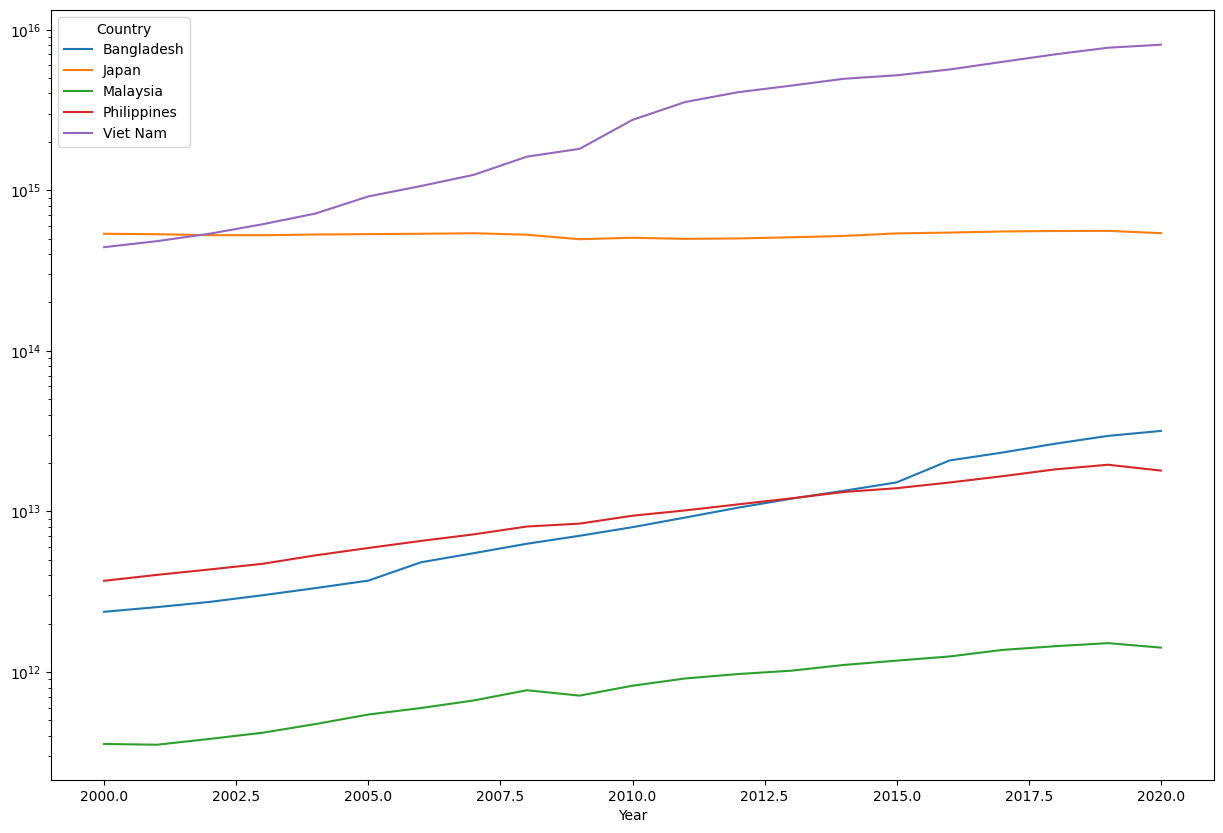

In [54]:
df_asia = df_asia.dropna(subset = ['GDP at current prices (domestic currency)'])
#Visualize environmental tax over year for each country, drop missing values year
df_asia.groupby(['Year', 'Country'])['GDP at current prices (domestic currency)'].sum().unstack().plot(kind = 'line', figsize = (15, 10))
# Rescale y axis to log scale
plt.yscale('log')


In [55]:
# Compute the environmental tax rate 
df_asia['Environmental Tax Revenue'] = df_asia['Environmental Taxes (% of GDP)'] * df_asia['GDP at current prices (domestic currency)']
# Compute the non-renewable energy share
df_asia['Non-Renewable Energy Share'] = 100 - df_asia['Renewable Energy Share in Total Final Energy Consumption (%)']
# Compute tax rate 
df_asia['Tax Rate'] = df_asia['Environmental Tax Revenue'] / df_asia['Non-Renewable Energy Share']

<Axes: xlabel='Year'>

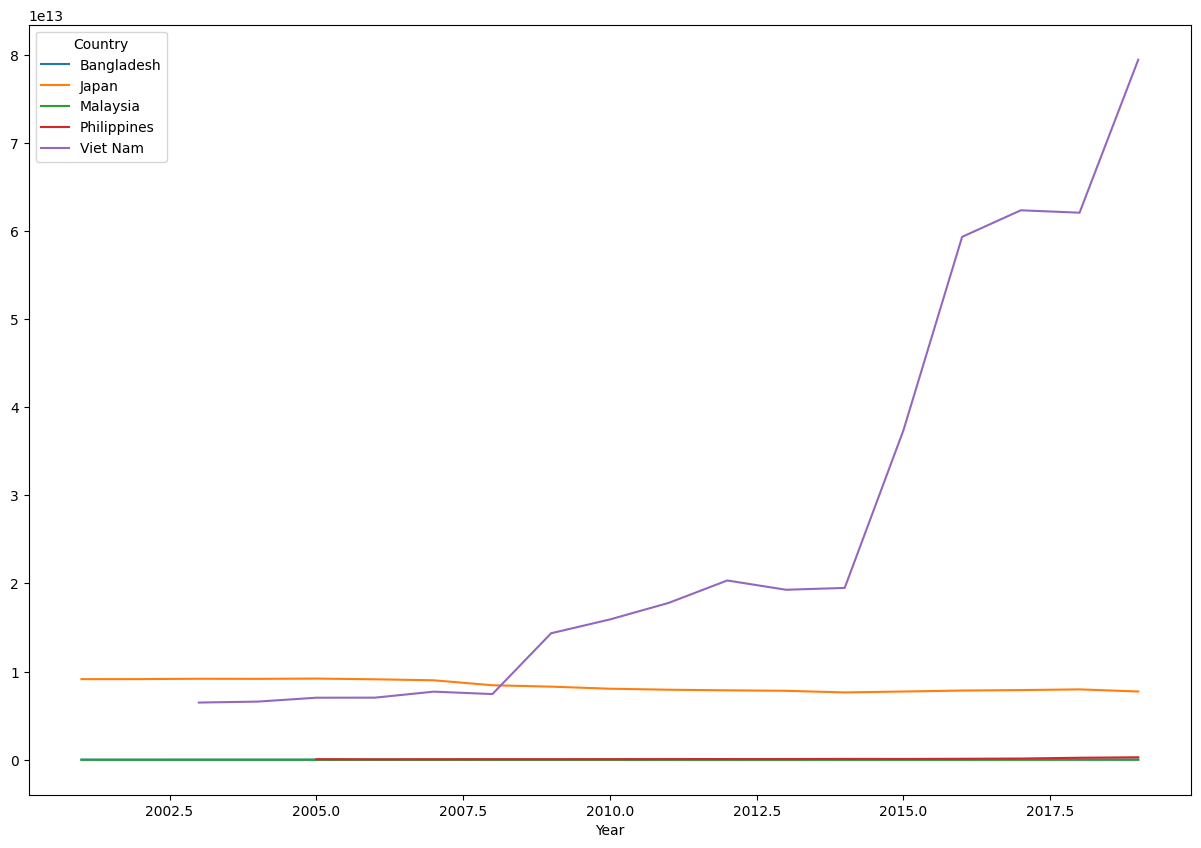

In [56]:
# Drop missing values
df_asia = df_asia.dropna(subset = ['Tax Rate'])
# Plot environmental tax rate over time 
df_asia.groupby(['Year', 'Country'])['Tax Rate'].sum().unstack().plot(kind = 'line', figsize = (15, 10))

In [67]:
#Print out tax rate for each country
df_asia.groupby('Country')['Tax Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
bangladesh,19.0,9.811926e+09,6.123494e+09,2.876673e+09,5.823599e+09,8.024754e+09,1.322469e+10,2.909425e+10
japan,19.0,8.384980e+12,6.246855e+11,7.636845e+12,7.862719e+12,8.059645e+12,9.136589e+12,9.209042e+12
malaysia,19.0,3.264203e+09,2.921799e+09,1.780449e+09,2.133368e+09,2.295455e+09,2.652509e+09,1.192704e+10
philippines,15.0,1.005862e+11,6.689524e+10,4.708013e+10,5.886904e+10,7.896383e+10,1.015809e+11,2.792044e+11
viet nam,17.0,2.647363e+13,2.409705e+13,6.487500e+12,7.449674e+12,1.779114e+13,3.736833e+13,7.942571e+13


<Axes: xlabel='Year'>

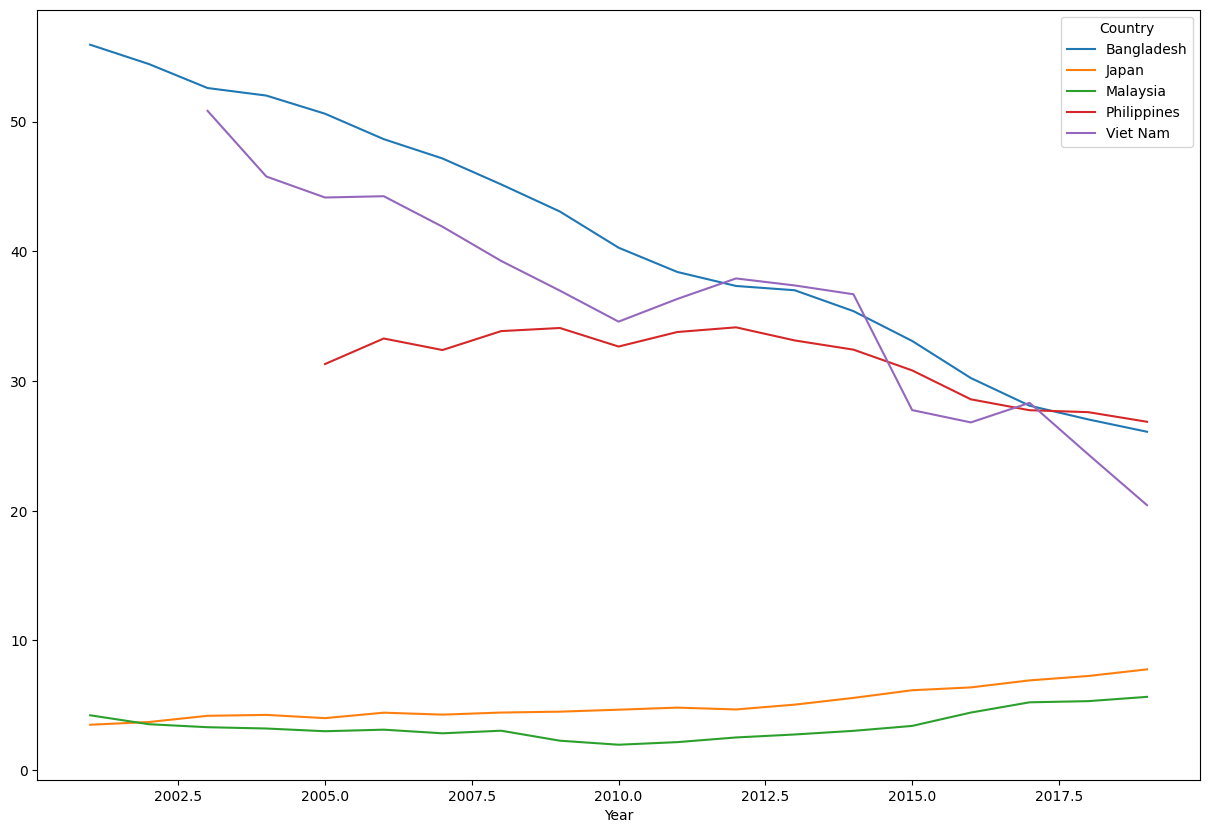

In [57]:
df_asia = df_asia.dropna(subset = ['Renewable Energy Share in Total Final Energy Consumption (%)'])
#Visualize environmental tax over year for each country, drop missing values year
df_asia.groupby(['Year', 'Country'])['Renewable Energy Share in Total Final Energy Consumption (%)'].sum().unstack().plot(kind = 'line', figsize = (15, 10))

<Axes: xlabel='Year'>

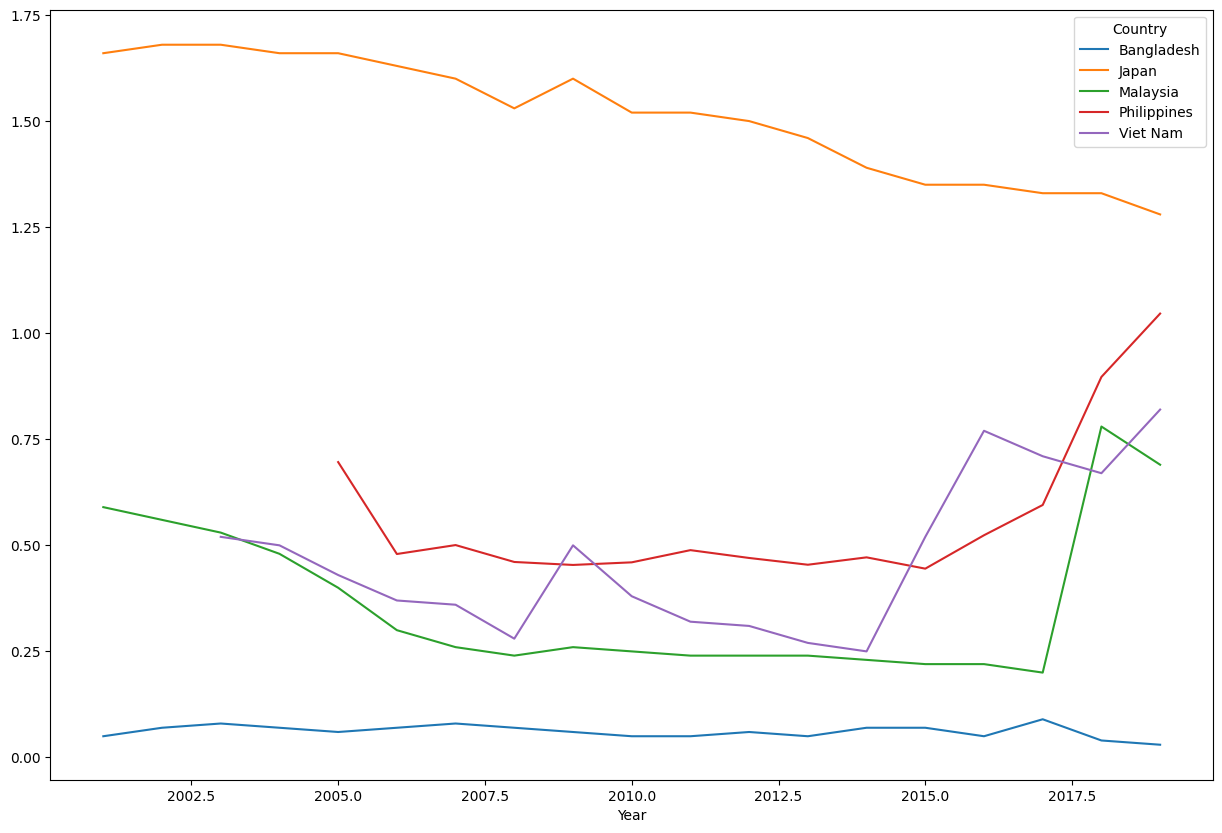

In [58]:
df_asia = df_asia.dropna(subset = ['Environmental Taxes (% of GDP)'])
#Visualize environmental tax over year for each country, drop missing values year
df_asia.groupby(['Year', 'Country'])['Environmental Taxes (% of GDP)'].sum().unstack().plot(kind = 'line', figsize = (15, 10))

In [59]:
# Divide countries into East Asia and South East Asia 
# Standardize the "Country" column to lowercase and strip whitespace
df_asia["Country"] = df_asia["Country"].str.strip().str.lower()

# Define the region mapping (keys should also be lowercase)
region_mapping = {
    'bangladesh': 'South East Asia',
    'japan': 'East Asia',
    'malaysia': 'South East Asia',
    'philippines': 'South East Asia',
    'viet nam': 'South East Asia'
}

# Map countries to regions
df_asia["Subregion"] = df_asia["Country"].map(region_mapping)

# Inspect the result
print(df_asia.head())


      Country  Year  Environmental Taxes (Domestic Currency)  \
1  bangladesh  2001                             1.473000e+09   
2  bangladesh  2002                             2.298000e+09   
3  bangladesh  2003                             2.938000e+09   
4  bangladesh  2004                             2.504000e+09   
5  bangladesh  2005                             2.607000e+09   

   Environmental Taxes (% of GDP) Region  \
1                            0.05   Asia   
2                            0.07   Asia   
3                            0.08   Asia   
4                            0.07   Asia   
5                            0.06   Asia   

   Household Consumption Expenditure (% of GDP)  \
1                                      77.49679   
2                                      76.84114   
3                                      76.01970   
4                                      74.93768   
5                                      74.44633   

  Renewable Energy Share in Total Final Ene

$$
RE\_share_{it} = \beta_0 + \beta_1 EnvTax_{it} + \beta_2 X_{it} + \alpha_i + \epsilon_{it}
$$



In [60]:
# Convert columns to numeric
df_asia["Renewable Energy Share in Total Final Energy Consumption (%)"] = pd.to_numeric(df_asia["Renewable Energy Share in Total Final Energy Consumption (%)"], errors='coerce')
df_asia["Environmental Taxes (% of GDP)"] = pd.to_numeric(df_asia["Environmental Taxes (% of GDP)"], errors='coerce')
df_asia["Total GHG Emissions (t '000 CO₂ equivalent)"] = pd.to_numeric(df_asia["Total GHG Emissions (t '000 CO₂ equivalent)"], errors='coerce')
df_asia["Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP)"] = pd.to_numeric(df_asia["Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP)"], errors='coerce')
df_asia["R&D Expenditure (% of GDP)"] = pd.to_numeric(df_asia["R&D Expenditure (% of GDP)"], errors='coerce')
df_asia["Household Consumption Expenditure (% of GDP)"] = pd.to_numeric(df_asia["Household Consumption Expenditure (% of GDP)"], errors='coerce')
df_asia["Tax Rate"] = pd.to_numeric(df_asia["Tax Rate"], errors='coerce')
# Compute mean 
df_asia["renew_energy_share_mean"] = df_asia.groupby(["Country", "Year"])["Renewable Energy Share in Total Final Energy Consumption (%)"].transform("mean")
df_asia["envi_tax_mean"] = df_asia.groupby(["Country", "Year"])["Environmental Taxes (% of GDP)"].transform("mean")
df_asia["Total_GHG_mean"] = df_asia.groupby(["Country", "Year"])["Total GHG Emissions (t '000 CO₂ equivalent)"].transform("mean")
df_asia["energy_intensity_mean"] = df_asia.groupby(["Country", "Year"])["Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP)"].transform("mean")
df_asia["R&D_expenditure_mean"] = df_asia.groupby(["Country", "Year"])["R&D Expenditure (% of GDP)"].transform("mean")

In [61]:
#Take log of GHG
df_asia["lnGHG"] = np.log(df_asia["Total GHG Emissions (t '000 CO₂ equivalent)"])

In [62]:
# Demean variables to cancel time effects
#df_asia["renew_energy_share_demean"] = df_asia["Renewable Energy Share in Total Final Energy Consumption (%)"] - df_asia["renew_energy_share_mean"]
#df_asia["envi_tax_demean"] = df_asia["Environmental Taxes (% of GDP)"] - df_asia["envi_tax_mean"]
#df_asia["Total_GHG_demean"] = df_asia["Total GHG Emissions (t '000 CO₂ equivalent)"] - df_asia["Total_GHG_mean"]
#df_asia["energy_intensity_demean"] = df_asia["Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP)"] - df_asia["energy_intensity_mean"]
#df_asia["R&D_expenditure_demean"] = df_asia["R&D Expenditure (% of GDP)"] - df_asia["R&D_expenditure_mean"]

In [63]:
# Add country fixed effects
df_dummy = pd.get_dummies(df_asia, columns= ["Country", "Subregion"])
df_dummy.head()

,Year,Environmental Taxes (Domestic Currency),Environmental Taxes (% of GDP),Region,Household Consumption Expenditure (% of GDP),Renewable Energy Share in Total Final Energy Consumption (%),"Sources of Electricity, Combustible Fuels (% of Total)","Sources of Electricity, Hydropower (% of Total)","Sources of Electricity, Solar (% of Total)","Sources of Electricity, Others (% of Total)",...,energy_intensity_mean,R&D_expenditure_mean,lnGHG,Country_bangladesh,Country_japan,Country_malaysia,Country_philippines,Country_viet nam,Subregion_East Asia,Subregion_South East Asia
1,2001,1.473000e+09,0.05,Asia,77.49679,55.93,94.16603,5.833970,NaN,NaN,...,2.58,NaN,18.579994,True,False,False,False,False,False,True
2,2002,2.298000e+09,0.07,Asia,76.84114,54.44,94.149608,5.850392,NaN,NaN,...,2.52,NaN,18.610886,True,False,False,False,False,False,True
3,2003,2.938000e+09,0.08,Asia,76.01970,52.59,94.287744,5.712256,NaN,NaN,...,2.53,NaN,18.626774,True,False,False,False,False,False,True
4,2004,2.504000e+09,0.07,Asia,74.93768,52.01,95.03322,4.966780,NaN,NaN,...,2.45,NaN,18.642520,True,False,False,False,False,False,True
5,2005,2.607000e+09,0.06,Asia,74.44633,50.61,95.121859,4.878141,NaN,NaN,...,2.42,NaN,18.680368,True,False,False,False,False,False,True


In [64]:
import statsmodels.api as sm
X = df_dummy[[ #"Environmental Taxes (% of GDP)",
                "Tax Rate",
              #"Total GHG Emissions (t '000 CO₂ equivalent)", 
              #"lnGHG",
              #"Energy Intensity Measured in Terms of Primary Energy and GDP (MJ/$ 2017 PPP GDP)", 
              #"Household Consumption Expenditure (% of GDP)", 
              "Country_bangladesh", "Country_japan", 
              "Country_malaysia", 
              #"Country_viet nam",
              "Country_philippines",
              #"Subregion_East Asia", 
              #"Subregion_South East Asia"
              ]]
Y = df_dummy["Renewable Energy Share in Total Final Energy Consumption (%)"]

In [65]:
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_33084/589463659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


In [66]:
# Drop rows with missing values in X
X = X.dropna()

# Ensure Y matches the indices of X
Y = Y[X.index]

result_1 = sm.OLS(endog = Y, exog = X).fit()
robust_result_1 = result_1.get_robustcov_results(cov_type='HC3')
print(robust_result_1.summary())

                                                 OLS Regression Results                                                 
Dep. Variable:     Renewable Energy Share in Total Final Energy Consumption (%)   R-squared:                       0.371
Model:                                                                      OLS   Adj. R-squared:                  0.341
Method:                                                           Least Squares   F-statistic:                       nan
Date:                                                          Wed, 22 Jan 2025   Prob (F-statistic):                nan
Time:                                                                  14:37:38   Log-Likelihood:                -359.29
No. Observations:                                                            89   AIC:                             728.6
Df Residuals:                                                                84   BIC:                             741.0
Df Model:                       